<a href="https://colab.research.google.com/github/NosenkoArtem/Categorical-Encoding/blob/master/Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
!git clone https://github.com/sberbank-ai-lab/pytorch-lifestream.git

Cloning into 'pytorch-lifestream'...
remote: Enumerating objects: 9988, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 9988 (delta 116), reused 183 (delta 107), pack-reused 9788 (from 1)
Receiving objects: 100% (9988/9988), 47.64 MiB | 24.30 MiB/s, done.
Resolving deltas: 100% (7491/7491), done.


In [ ]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

import logging
import pytorch_lightning as pl
import warnings

warnings.filterwarnings('ignore')
logging.getLogger("pytorch_lightning").setLevel(logging.ERROR)

### 1.Эмбеддинги в NLP

#### 1.1 Игрушечный пример

Посмотрим как работает word2vec на простом примере

In [ ]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

import logging
import pytorch_lightning as pl
import warnings

warnings.filterwarnings('ignore')
logging.getLogger("pytorch_lightning").setLevel(logging.ERROR)


### Игрушечный пример
!pip install gensim

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import gensim
from gensim.models import Word2Vec

# список предложений, где каждое предложение - список слов
sentences = [
    ["кошка", "гоняется", "мышь"],
    ["собака", "гоняется", "за", "кошкой"],
    ["кошка", "бежит", "от", "собаки"],
    ["кошка", "бежит", "за", "мышкой"],
    ["кошка", "ловит", "игрушку"]
]


<img src="https://i2.wp.com/miro.medium.com/1*IAvi1IEavTmXTxE9uegEfw.png" alt='Обучение wor2vec' width="750"/>


In [ ]:
# Создание модели Word2Vec
model = Word2Vec(sentences,       #текст
                 vector_size=100, #размер эмбеддинга
                 window=3,        #окно контекста
                 min_count=1,     #мин. количество вхождений слова для добавление в словарь
                 workers=4,
                 sg=1             # 1 for skip-gram; otherwise CBOW.
                 )

In [ ]:
# обучаем word2vec
model.train(sentences, total_examples=model.corpus_count, epochs=10)

# Получение вектора слова
vector = model.wv['кошка']
print(f'Пример вектора: {vector}')

# Поиск похожих слов
similar_words = model.wv.most_similar('кошка')
similar_words.sort(key=lambda x: (x[-1]), reverse=True)
similar_words

Пример вектора: [-5.3734693e-04  2.3667100e-04  5.1051653e-03  9.0119820e-03
 -9.3012955e-03 -7.1190591e-03  6.4609912e-03  8.9755747e-03
 -5.0173802e-03 -3.7659360e-03  7.3821470e-03 -1.5359547e-03
 -4.5388918e-03  6.5587754e-03 -4.8604934e-03 -1.8140019e-03
  2.8808999e-03  9.9578686e-04 -8.2867220e-03 -9.4515420e-03
  7.3133134e-03  5.0687334e-03  6.7628413e-03  7.6003873e-04
  6.3538640e-03 -3.4041640e-03 -9.4842038e-04  5.7693496e-03
 -7.5227153e-03 -3.9346702e-03 -7.5075626e-03 -9.2961988e-04
  9.5384950e-03 -7.3209140e-03 -2.3339887e-03 -1.9366394e-03
  8.0787940e-03 -5.9312042e-03  4.7003021e-05 -4.7529805e-03
 -9.6001951e-03  5.0042230e-03 -8.7614413e-03 -4.3937997e-03
 -3.5374356e-05 -2.9164500e-04 -7.6615610e-03  9.6128825e-03
  4.9820123e-03  9.2338230e-03 -8.1560854e-03  4.4912514e-03
 -4.1392692e-03  8.2628435e-04  8.4972512e-03 -4.4617234e-03
  4.5202305e-03 -6.7871935e-03 -3.5504545e-03  9.3999244e-03
 -1.5805700e-03  3.2146496e-04 -4.1410387e-03 -7.6845647e-03
 -1.5076

[('кошкой', 0.21614062786102295),
 ('собаки', 0.09288005530834198),
 ('мышь', 0.07961820065975189),
 ('собака', 0.06281683593988419),
 ('от', 0.027070263400673866),
 ('мышкой', 0.01630280539393425),
 ('бежит', -0.010532076470553875),
 ('игрушку', -0.027741743251681328),
 ('за', -0.05232493579387665),
 ('ловит', -0.05986964702606201)]

**<font color='orange'>(?) Вопрос:</font>** Видим, что `кошка` и `кошкой` име

In [ ]:
import gensim.downloader as api

# Загрузка предобученной модели Word2Vec (Google News, 300 измерений)
model = api.load("word2vec-google-news-300")

# Пример использования
similar_words = model.most_similar('cat')
print(similar_words)

print('time:', time.time() - start)
print('king + (woman - man) = ', model.wv.most_similar(positive=['woman', 'king'], negative=['man'])[0])
print('Japan + (Moscow - Russia) = ', model.wv.most_similar(positive=['Moscow', 'Japan'], negative=['Russia'])[0])

[==================================================] 100.0% 1662.8/1662.8MB downloaded
[('cats', 0.8099379539489746), ('dog', 0.760945737361908), ('kitten', 0.7464985251426697), ('feline', 0.7326234579086304), ('beagle', 0.7150582671165466), ('puppy', 0.7075453400611877), ('pup', 0.6934291124343872), ('pet', 0.6891531348228455), ('felines', 0.6755931973457336), ('chihuahua', 0.6709762215614319)]


### 2.Эмбеддинги в CV: хрупкости предобученных моделей

In [ ]:
import requests
from tqdm import tqdm

import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import models
from torchvision.models import resnet50, ResNet50_Weights
from torchvision import datasets, models, transforms

torch.manual_seed(42)

from skimage.transform import resize
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_device(device)

# загружаем предобученную на ImageNet модель
model = models.vgg16(pretrained=True).eval()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 76.9MB/s]


In [ ]:
# загрузим список классов для ImageNet
LABELS_URL = 'https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json'
labels = {i: c for i, c in enumerate(requests.get(LABELS_URL).json())}


def transform_input(img):
    return torch.as_tensor(
                          img.reshape([1, 256, 256, 3]).\
                          transpose([0, 3, 1, 2]), dtype=torch.float32
                          )


def predict(model, img):
    img = transform_input(img).to(device)                   #подготавливаем изображение
    probs = torch.nn.functional.softmax(model(img), dim=-1) #считаем вероятности для всех классов
    probs = probs.data.cpu().numpy()

    top_ix = probs.ravel().argsort()[-1:-10:-1]             #опр. индексы для топ-10 классов
    print ('top-10 classes are: \n [prob : class label]')
    for l in top_ix:
        print ('%.4f :\t%s' % (probs.ravel()[l], labels[l].split(',')[0]))

In [ ]:
!wget http://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg -O Trump.jpg

--2025-02-26 18:40:42--  http://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg
Resolving cdn.com.do (cdn.com.do)... 104.21.42.94, 172.67.160.120, 2606:4700:3036::ac43:a078, ...
Connecting to cdn.com.do (cdn.com.do)|104.21.42.94|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg [following]
--2025-02-26 18:40:42--  https://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg
Connecting to cdn.com.do (cdn.com.do)|104.21.42.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51048 (50K) [image/jpeg]
Saving to: ‘Trump.jpg’

Trump.jpg           100%[===================>]  49.85K  --.-KB/s    in 0.008s  

2025-02-26 18:40:42 (5.83 MB/s) - ‘Trump.jpg’ saved [51048/51048]



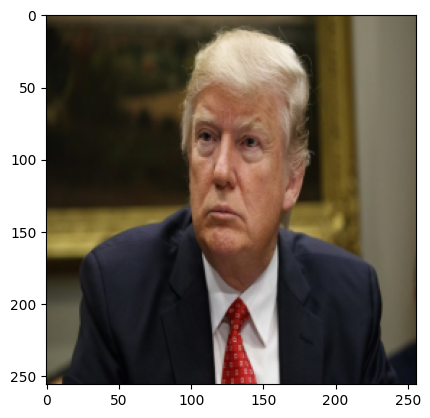

top-10 classes are: 
 [prob : class label]
0.4610 :	suit
0.2847 :	Windsor tie
0.0587 :	lab coat
0.0355 :	bow tie
0.0144 :	oboe
0.0135 :	bridegroom
0.0097 :	wig
0.0084 :	square academic cap
0.0081 :	academic gown


In [ ]:
img = resize(plt.imread('Trump.jpg'), (256, 256))
plt.imshow(img)
plt.show()

# формируем предсказание модели
predict(model, img)

Видим, что в топ-2 вошли классы `suit` и `Windsor tie`.

**<font color='orange'>(?) Вопрос:</font>** Почему так произошло?

**<font color='orange'>(?) Вопрос:</font>** Как заставить модель верно классифицировать такие картинки?

###  3.Гео эмбеддинги на основе транзакций

Посмотрим как обучать эмбеддинги на основе транзаций, которые происходят в гексогонах.

Для этого используем библиотеку [Pytorch-lifestream](https://github.com/dllllb/pytorch-lifestream?tab=readme-ov-file), которая позволят формировать эмбеддинги, которые учитывают изначальную информацию, контекст и/или похожие объекты.

Это open-source библиотека, предназначенная для работы со
сложноструктурированными последовательными данными (банковские транзакции, clickstream интернет-провайдеров и.т.п), с помощью нейросетевых методов, реализованных в ней, событийные данные можно преобразовывать в эмбеддинги и подавать на вход моделей. Или использовать нейросетевые архитектуры сразу для предсказаний.

Вот [тут](https://habr.com/ru/articles/704440/) можно почитать, как она помогла для выиграть **серебро** в соревновании на kaggle.

Основные особенности:



1.   Обучение "без учителя"
2.   Несколько вариантов энкодеров/функций потерь



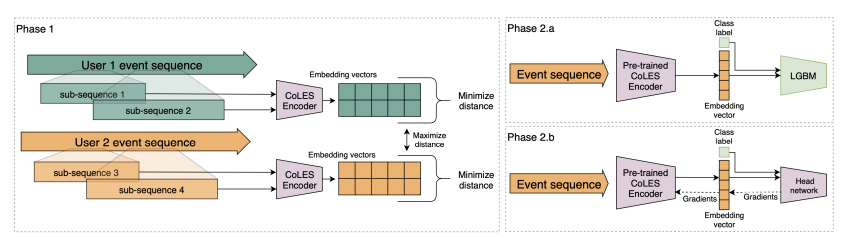

In [ ]:
!git clone https://github.com/sberbank-ai-lab/pytorch-lifestream.git

fatal: destination path 'pytorch-lifestream' already exists and is not an empty directory.


In [ ]:
!pip install -q torchmetrics==0.11.4
!pip install -q pytorch_lightning==1.9.0

In [ ]:
import sys
sys.path.append('/content/pytorch-lifestream')

In [ ]:
import torchmetrics
torchmetrics.__version__

'0.11.4'

In [ ]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

import logging
import pytorch_lightning as pl
import warnings

warnings.filterwarnings('ignore')
logging.getLogger("pytorch_lightning").setLevel(logging.ERROR)

#### Подготовка данных

In [ ]:
import os
import pandas as pd

# загружаем данные по транзакциям
source_data = pd.read_csv("hf://datasets/dllllb/age-group-prediction/transactions_train.csv.gz")
random_client_id = list(set(source_data['client_id'].unique()))[:5_000] # возьмем только 5_000 ID

source_data = source_data[source_data['client_id'].isin(random_client_id)]
source_data.head(2)

,client_id,trans_date,small_group,amount_rur
772,3694,26,1,10.006
773,3694,29,3,54.955


In [ ]:
from dltranz.data_preprocessing import PandasDataPreprocessor

# подготавливаем данные для обучения модели
preprocessor = PandasDataPreprocessor(
    col_id='client_id',                         #ID клиента (или геометки)
    cols_event_time='trans_date',               #Временная метка
    time_transformation='float',
    cols_category=["trans_date", "small_group"], #Категории транзакций
    cols_log_norm=["amount_rur"],                #Колонки для нормирования
    cols_identity=[],
    print_dataset_info=False,
)

In [ ]:
%%time

dataset = preprocessor.fit_transform(source_data)

CPU times: user 12.1 s, sys: 1.53 s, total: 13.6 s
Wall time: 13.4 s


In [ ]:
from sklearn.model_selection import train_test_split

# разибваем на train test
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

print(len(train), len(test))

4000 1000


#### Обучение эмбеддингов при помощи фреймворка pytorch lightning

Model training in our framework organised via pytorch-lightning (pl) framework.
The key parts of neural networks training in pl are:

    * model (pl.LightningModule)
    * data_module (pl.LightningDataModule)
    * pl.trainer (pl.trainer)
    
For futher details check https://www.pytorchlightning.ai/

#### Создание и загрузка модели

In [ ]:
from dltranz.seq_encoder import SequenceEncoder
from dltranz.models import Head
from dltranz.lightning_modules.emb_module import EmbModule

seq_encoder = SequenceEncoder(
    category_features=preprocessor.get_category_sizes(), #категории (например, MCC-коды)
    encoder_type='rnn',                                  #тип энкодера
    numeric_features=["amount_rur"],                     #числовые признаки
    trx_embedding_noize=0.003
)  #формируем энкодер

head = Head(input_size=seq_encoder.embedding_size, use_norm_encoder=True) # "голова" над энкодером: линейный слой + softmax
model = EmbModule(seq_encoder=seq_encoder, head=head)

#### Модуль формирования загрузчика данных

In [ ]:
from dltranz.data_load.data_module.emb_data_module import EmbeddingTrainDataModule

dm = EmbeddingTrainDataModule(
    dataset=train,
    pl_module=model,
    min_seq_len=25,
    seq_split_strategy='SampleSlices',
    category_names = model.seq_encoder.category_names,
    category_max_size = model.seq_encoder.category_max_size,
    split_count=5,
    split_cnt_min=25,
    split_cnt_max=200,
    train_num_workers=16,
    train_batch_size=256,
    valid_num_workers=16,
    valid_batch_size=256
)

#### Обучение

In [ ]:
import torch
import pytorch_lightning as pl

trainer = pl.Trainer(
#     progress_bar_refresh_rate=0,
    max_epochs=20, #нужно тренировать 20-50  эпох до сходимости
    gpus=1 if torch.cuda.is_available() else 0
)

In [ ]:
%%time

trainer.fit(model, dm)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

CPU times: user 2min 41s, sys: 50.9 s, total: 3min 32s
Wall time: 3min 48s


#### Применение

In [ ]:
# embedding inference

from dltranz.inference import get_embeddings

train_embeds = get_embeddings(
    data=train,
    model=model,
    category_names = model.seq_encoder.category_names,
    category_max_size = model.seq_encoder.category_max_size,
)

test_embeds = get_embeddings(
    data=test,
    model=model,
    category_names = model.seq_encoder.category_names,
    category_max_size = model.seq_encoder.category_max_size,
)

train_embeds.shape, test_embeds.shape

4000it [00:00, 12433.08it/s]
1000it [00:00, 14747.80it/s]


((4000, 512), (1000, 512))

In [ ]:
# join target and embeddings

df_target = pd.read_csv("hf://datasets/dllllb/age-group-prediction/train_target.csv")
df_target = df_target.set_index('client_id')
df_target.rename(columns={"bins": "target"}, inplace=True)

train_df = pd.DataFrame(data=train_embeds,
                        columns=[f'embed_{i}' for i in range(train_embeds.shape[1])]
                        )
train_df['client_id'] = [x['client_id'] for x in train]
train_df = train_df.merge(df_target, how='left', on='client_id')

test_df = pd.DataFrame(data=test_embeds, columns=[f'embed_{i}' for i in range(test_embeds.shape[1])])
test_df['client_id'] = [x['client_id'] for x in test]
test_df = test_df.merge(df_target, how='left', on='client_id')


print(train_df.shape, test_df.shape)
train_df.head(2)

(4000, 514) (1000, 514)


,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_504,embed_505,embed_506,embed_507,embed_508,embed_509,embed_510,embed_511,client_id,target
0,-0.594864,0.405963,-0.479889,0.080512,0.336292,-0.716367,-0.190560,0.079730,-0.005390,0.739909,...,0.434265,0.302713,-0.427233,0.288629,-0.356792,-0.064152,-0.107049,-0.109960,7004,0
1,-0.446511,0.441322,-0.527724,0.270875,0.386320,-0.722042,-0.302759,-0.011804,-0.050482,0.741308,...,0.413937,0.143895,-0.441203,0.298321,-0.011649,0.056279,-0.283175,-0.146896,7754,0


Теперь полученные эмбеддинги можно использовать для задачи.

In [ ]:
from sklearn.linear_model import LogisticRegression

embed_columns = [x for x in train_df.columns if x.startswith('embed')]
x_train, y_train = train_df[embed_columns], train_df['target']
x_test, y_test = test_df[embed_columns], test_df['target']

clf = LogisticRegression()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.406